In [1]:
# Install Required Libraries
!pip install torch torchvision ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-kljj48jx
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-kljj48jx
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=5d398fdeed642547b30faba1558ad084ea400f694ef0f971643939c6bc1898af
  Stored in directory: /tmp/pip-ephem-wheel-cache-wk3r53g7/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [1]:
# Import Libraries
import torch
import clip
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Load CLIP Model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 90.9MiB/s]


In [4]:
# Define Candidate Captions
captions = [
    "A dog playing in the park",
    "A cat sitting on a sofa",
    "A group of people walking on the street",
    "A car parked on the road",
    "A person riding a bicycle",
    "A beautiful natural landscape",
    "A man using a laptop"
]

Saving image1.jpg to image1 (1).jpg


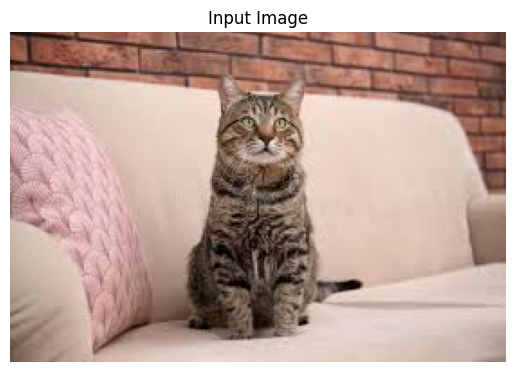

In [7]:
# Define Candidate Captions
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

image = Image.open("/content/image1.jpg")

plt.figure()
plt.imshow(image)
plt.axis("off")
plt.title("Input Image")
plt.show()

In [8]:
# Preprocess Image and Text
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = clip.tokenize(captions).to(device)

In [9]:
# Encode Image and Text
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Normalize embeddings
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

In [15]:
# Compute Similarity Scores
similarity = (image_features @ text_features.T).cpu().numpy()
scores = similarity.flatten()

In [11]:
# Predict Best Caption
best_index = np.argmax(scores)
predicted_caption = captions[best_index]

print("Predicted Caption:")
print(predicted_caption)

Predicted Caption:
A cat sitting on a sofa


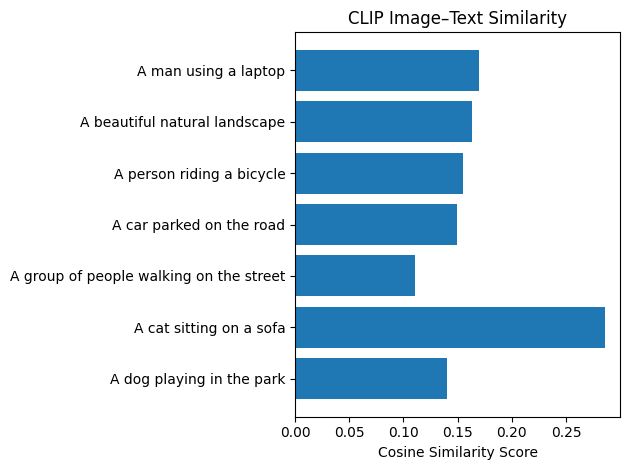

In [12]:
# Visualize Similarity Scores
plt.figure()
plt.barh(captions, scores)
plt.xlabel("Cosine Similarity Score")
plt.title("CLIP Image–Text Similarity")
plt.tight_layout()
plt.show()

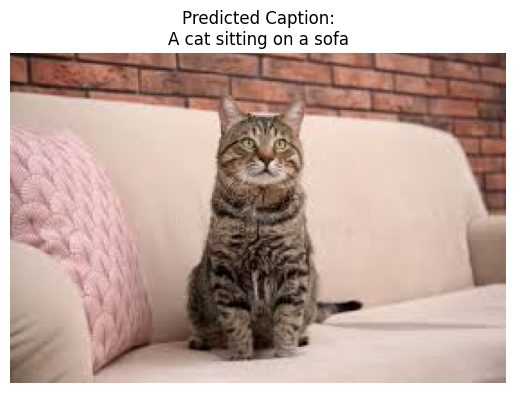

In [13]:
plt.figure()
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Caption:\n{predicted_caption}")
plt.show()